**DATA EXPLORATION OF EUROSAT**

In [7]:
DATA_PATH = '/Users/academic-city-university/Naps/DeepExam/Deep-Learning_EuroSAT_Classifier/lightvision/data/raw'

import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Path contains folders of 10 classes of EuroSAT dataset
# build the path using os.path.join for correct separators on all platforms
data_dir = os.path.join(DATA_PATH, 'eurosat', '2750')

# give a clear error if the directory does not exist
if not os.path.exists(data_dir):
	raise FileNotFoundError(
		f"Directory not found: {data_dir}\n"
		f"Check that the 'eurosat/2750' folder exists under DATA_PATH. "
		f"Contents of DATA_PATH: {os.listdir(DATA_PATH)}"
	)

class_names = os.listdir(data_dir)
print(f'Class names: {class_names}')
num_classes = len(class_names)
print(f'Number of classes: {num_classes}')


Class names: ['Forest', 'River', 'Highway', 'AnnualCrop', 'SeaLake', 'HerbaceousVegetation', 'Industrial', 'Residential', 'PermanentCrop', 'Pasture']
Number of classes: 10


In [9]:
#Data exploration
image_counts = {}
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_counts[class_name] = len(os.listdir(class_dir))
print(f'Image counts per class: {image_counts}')

Image counts per class: {'Forest': 3000, 'River': 2500, 'Highway': 2500, 'AnnualCrop': 3000, 'SeaLake': 3000, 'HerbaceousVegetation': 3000, 'Industrial': 2500, 'Residential': 3000, 'PermanentCrop': 2500, 'Pasture': 2000}


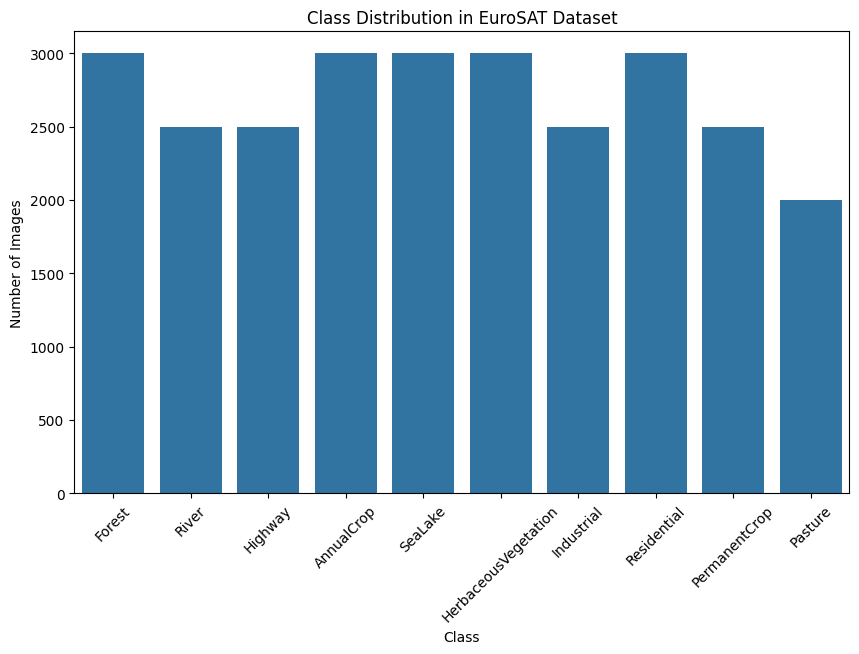

In [10]:
#Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in EuroSAT Dataset')
plt.show()

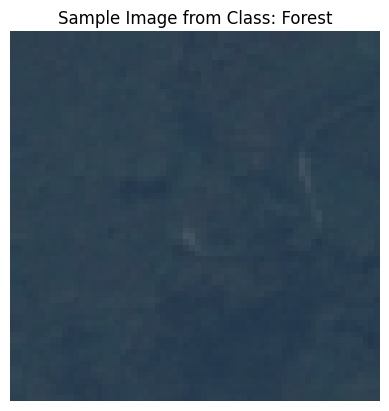

In [11]:
#Sample image visualization
import cv2  
sample_class = class_names[0]
sample_class_dir = os.path.join(data_dir, sample_class)
sample_image_name = os.listdir(sample_class_dir)[0]
sample_image_path = os.path.join(sample_class_dir, sample_image_name)
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image)
plt.title(f'Sample Image from Class: {sample_class}')
plt.axis('off')
plt.show()

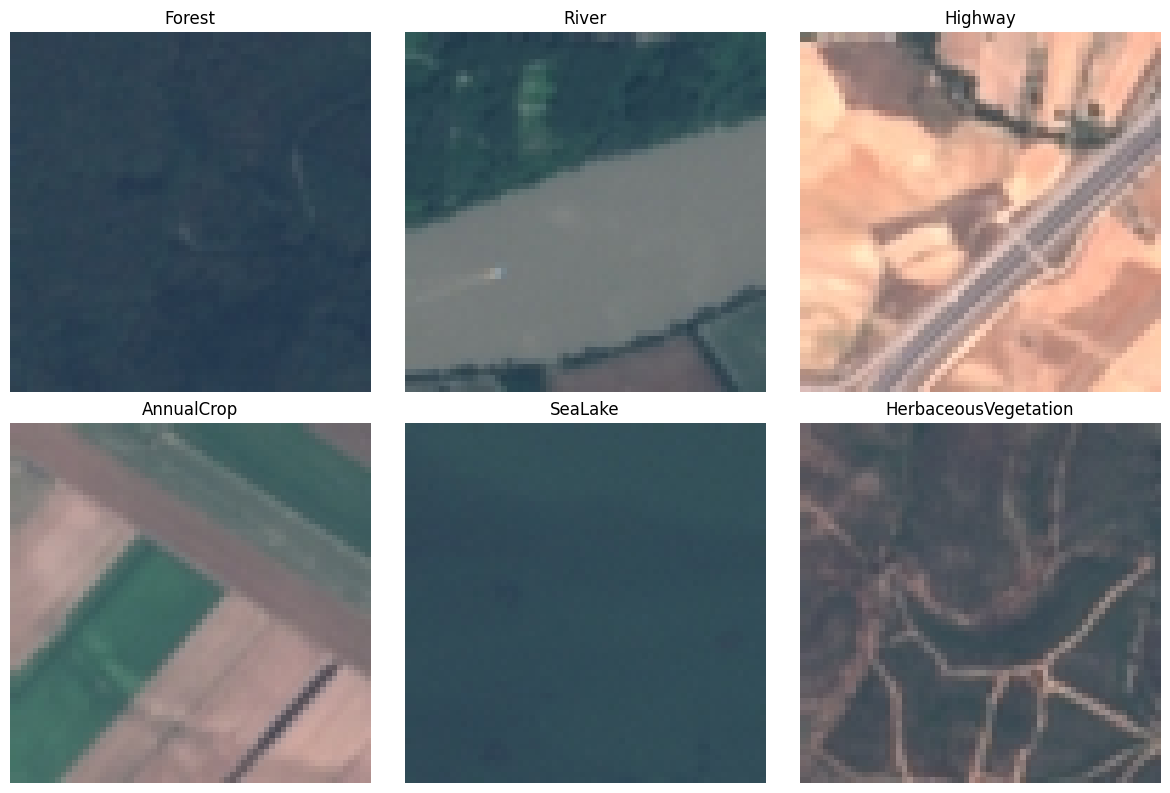

In [12]:
# Visualize multiple sample images from different classes
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(class_names[:6]):  # Display first 6 classes
    class_dir = os.path.join(data_dir, class_name)
    image_name = os.listdir(class_dir)[0]
    image_path = os.path.join(class_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()